In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from archpy import arch

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [12]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm


In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [15]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [16]:
tsla = pd.read_csv("avocado.csv")

In [17]:
tsla

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [18]:
cls = tsla['AveragePrice']

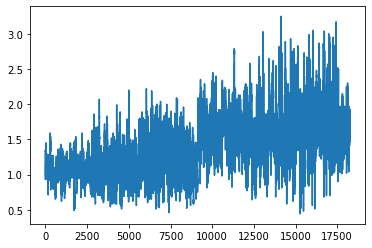

In [19]:
plt.plot(cls)

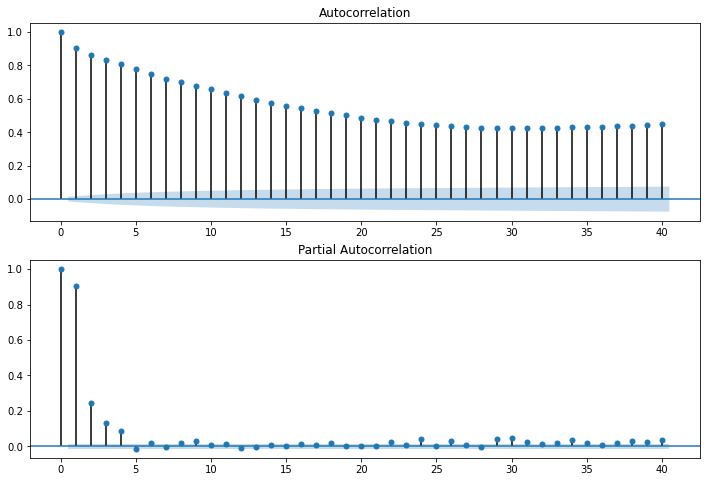

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cls.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cls, lags=40, ax=ax2)


In [13]:
arma_mod20 = sm.tsa.ARMA(cls, (1,0)).fit(disp=False)
print(arma_mod20.params)

const                 1.406050
ar.L1.AveragePrice    0.904241
dtype: float64


In [14]:
arma_mod30 = sm.tsa.ARMA(cls, (2,0)).fit(disp=False)
print(arma_mod30.params)

const                 1.406160
ar.L1.AveragePrice    0.685982
ar.L2.AveragePrice    0.241357
dtype: float64


In [15]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)


-13561.73635750539 -13530.488895253435 -13551.467618105253


In [38]:
sm.stats.durbin_watson(arma_mod30.resid.values)


1.7893312228141258

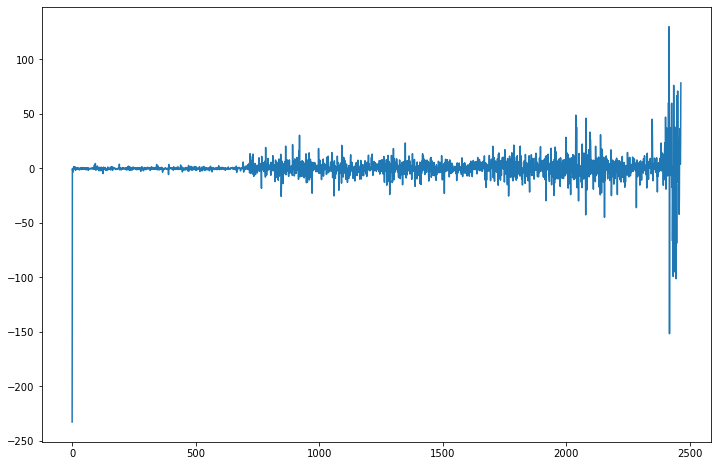

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);


In [26]:
resid = arma_mod30.resid


In [27]:
stats.normaltest(resid)


NormaltestResult(statistic=2226.234505861246, pvalue=0.0)

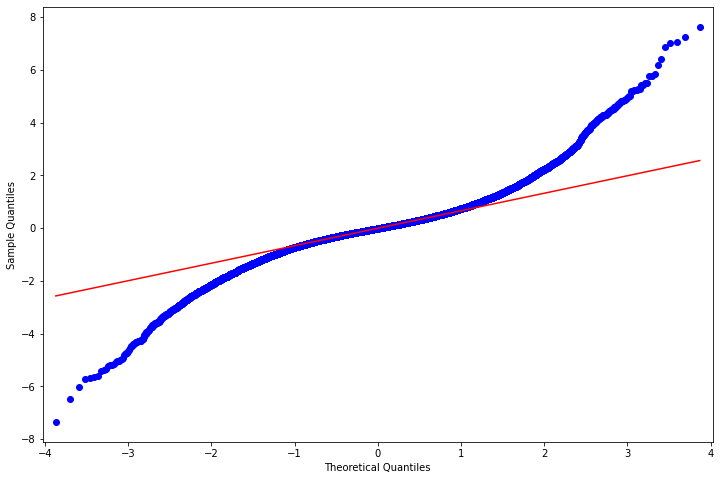

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

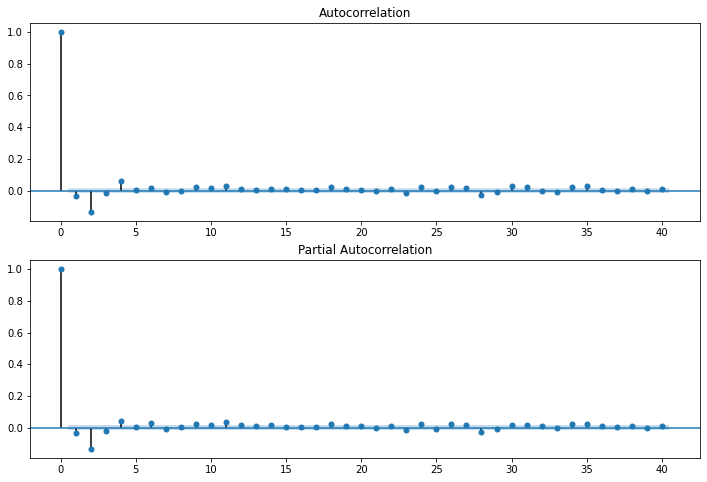

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [30]:

r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.031998   18.687344  1.540013e-05
2.0  -0.132622  339.730925  1.691870e-74
3.0  -0.013847  343.230908  4.358613e-74
4.0   0.062455  414.436679  2.112213e-88
5.0   0.002460  414.547176  2.170418e-87
6.0   0.014287  418.273933  3.288170e-87
7.0  -0.010919  420.450808  9.785311e-87
8.0  -0.001207  420.477417  7.774772e-86
9.0   0.023122  430.239809  4.791162e-87
10.0  0.016079  434.961027  3.364399e-87
11.0  0.027489  448.760206  2.644178e-89
12.0  0.009418  450.380279  7.842197e-89
13.0  0.001270  450.409726  4.846386e-88
14.0  0.012913  453.455488  6.617319e-88
15.0  0.006923  454.330962  2.511470e-87
16.0  0.003559  454.562363  1.259143e-86
17.0  0.000700  454.571315  6.802918e-86
18.0  0.021803  463.256130  5.410214e-87
19.0  0.011024  465.476532  9.569823e-87
20.0  0.005126  465.956581  3.818760e-86
21.0 -0.005460  466.501325  1.440397e-85
22.0  0.009669  468.209642  3.039360e-85
23.0 -0.012743  

In [31]:
cls

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [32]:
predictions = arma_mod30.predict(14599, 18249, dynamic=True)
print(predictions)

14599    1.674203
14600    1.658539
14601    1.643982
14602    1.630215
14603    1.617257
           ...   
18245    1.406160
18246    1.406160
18247    1.406160
18248    1.406160
18249    1.406160
Length: 3651, dtype: float64


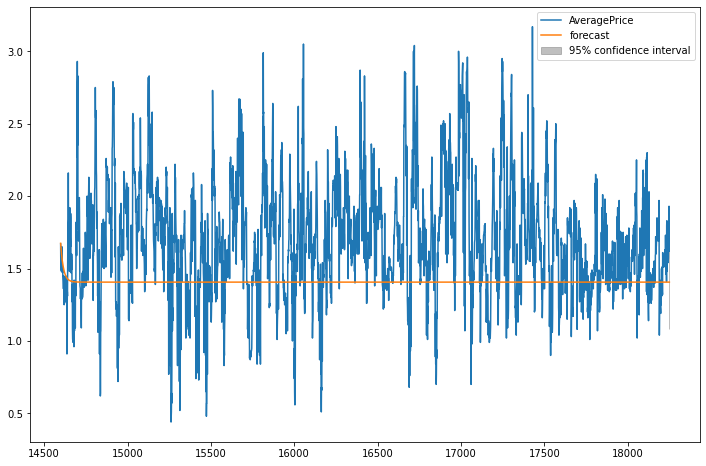

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = cls.loc[14599:].plot(ax=ax)
fig = arma_mod30.plot_predict(14599, 18249, dynamic=True, ax=ax, plot_insample=False)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2463
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -9122.453
Method:                       css-mle   S.D. of innovations              9.824
Date:                Wed, 20 May 2020   AIC                          18262.905
Time:                        21:19:30   BIC                          18315.188
Sample:                             1   HQIC                         18281.901
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2536      0.207      1.224      0.221      -0.153       0.660
ar.L1.D.Close     0.0574      0.020      2.821      0.005       0.018       0.097
ar.L2.D.Close     0.0052      0.020     

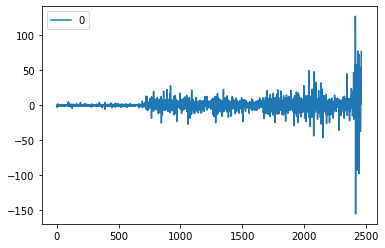

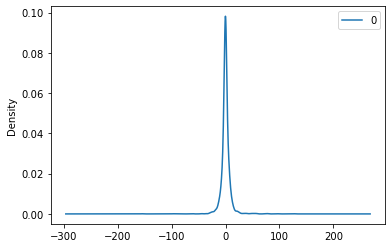

                 0
count  2463.000000
mean     -0.000135
std       9.826091
min    -155.375449
25%      -2.345098
50%      -0.173066
75%       2.165888
max     127.071150


In [73]:
model = ARIMA(cls, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [38]:
avoc1 = cls[-1000:]

predicted=1.978342, expected=1.970000
predicted=1.974779, expected=1.990000
predicted=1.984993, expected=2.040000
predicted=2.025257, expected=2.250000
predicted=2.196558, expected=1.900000
predicted=1.956442, expected=1.860000
predicted=1.903367, expected=1.530000
predicted=1.605933, expected=1.020000
predicted=1.159928, expected=1.420000
predicted=1.379254, expected=1.320000
predicted=1.300150, expected=1.350000
predicted=1.350595, expected=1.430000
predicted=1.406726, expected=1.420000
predicted=1.411927, expected=1.450000
predicted=1.441908, expected=1.360000
predicted=1.374688, expected=1.410000
predicted=1.405249, expected=1.440000
predicted=1.425976, expected=1.580000
predicted=1.543583, expected=1.330000
predicted=1.369830, expected=1.180000
predicted=1.235578, expected=1.600000
predicted=1.518448, expected=1.570000
predicted=1.531361, expected=1.540000
predicted=1.547640, expected=1.780000
predicted=1.727175, expected=1.560000
predicted=1.582952, expected=1.490000
predicted=1.

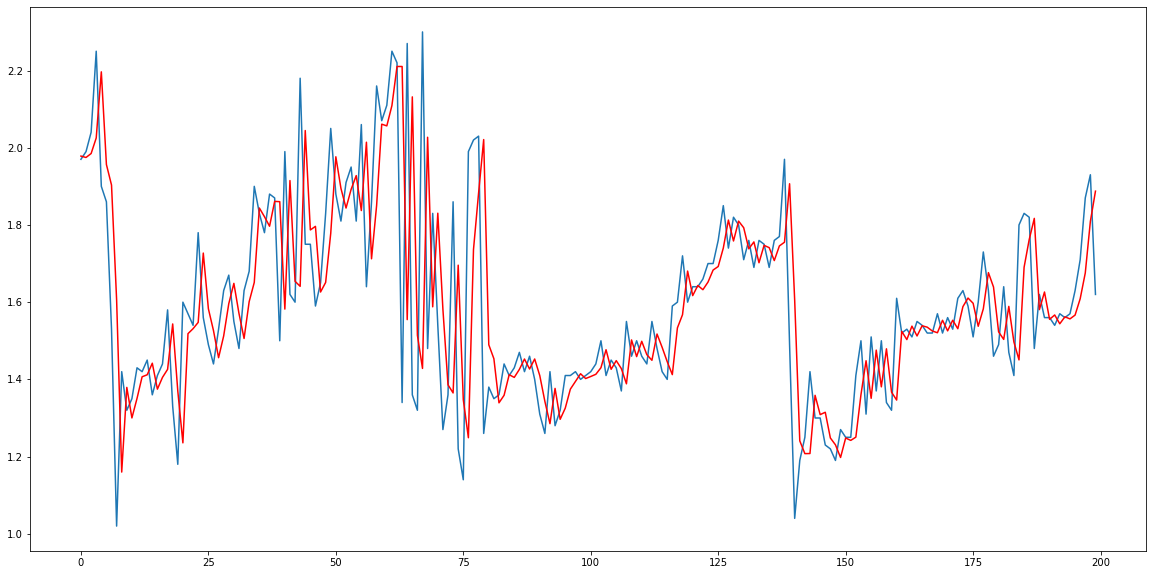

In [21]:
X = avoc1.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig = plt.figure(figsize=(20, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [22]:
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

0.13316854635400516
0.33402397391667105
16.682715919337447


predicted=1.989353, expected=1.970000
predicted=1.962517, expected=1.990000
predicted=1.990924, expected=2.040000
predicted=2.025146, expected=2.250000
predicted=2.188384, expected=1.900000
predicted=1.946918, expected=1.860000
predicted=1.883966, expected=1.530000
predicted=1.666261, expected=1.020000
predicted=1.183679, expected=1.420000
predicted=1.438368, expected=1.320000
predicted=1.362404, expected=1.350000
predicted=1.295311, expected=1.430000
predicted=1.418598, expected=1.420000
predicted=1.404928, expected=1.450000
predicted=1.430115, expected=1.360000
predicted=1.376157, expected=1.410000
predicted=1.402868, expected=1.440000
predicted=1.436510, expected=1.580000
predicted=1.533180, expected=1.330000
predicted=1.364295, expected=1.180000
predicted=1.225412, expected=1.600000
predicted=1.552729, expected=1.570000
predicted=1.539441, expected=1.540000
predicted=1.488679, expected=1.780000
predicted=1.728589, expected=1.560000
predicted=1.582523, expected=1.490000
predicted=1.

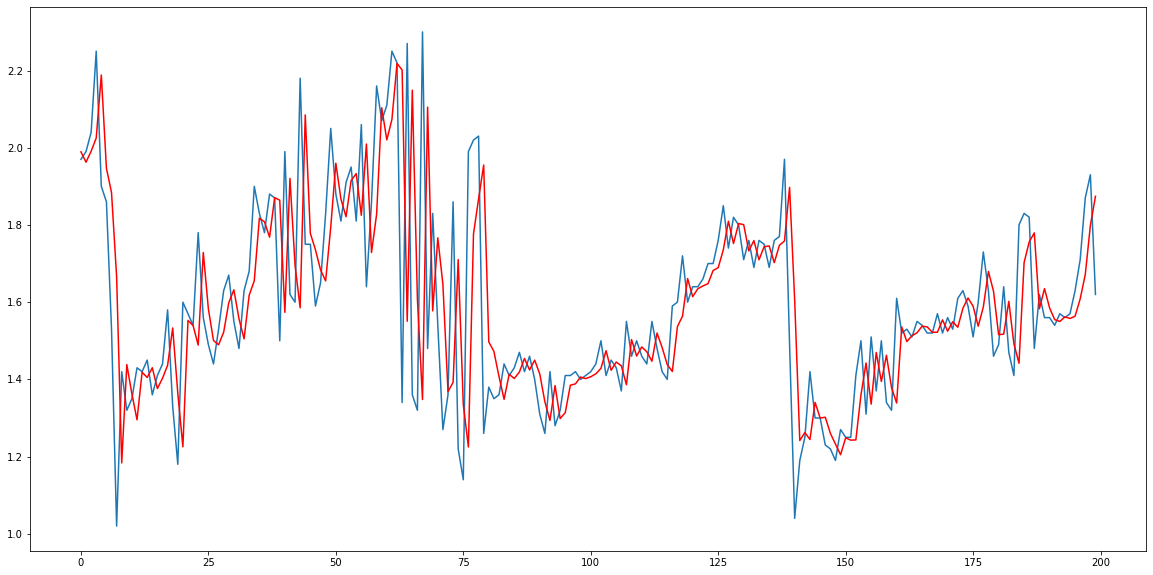

In [23]:
X = avoc1.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig = plt.figure(figsize=(20, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [24]:
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

0.1339175038334545
0.3329246003325947
16.626318844715822


In [ ]:
predictions = arch(avoc1, 'arch')


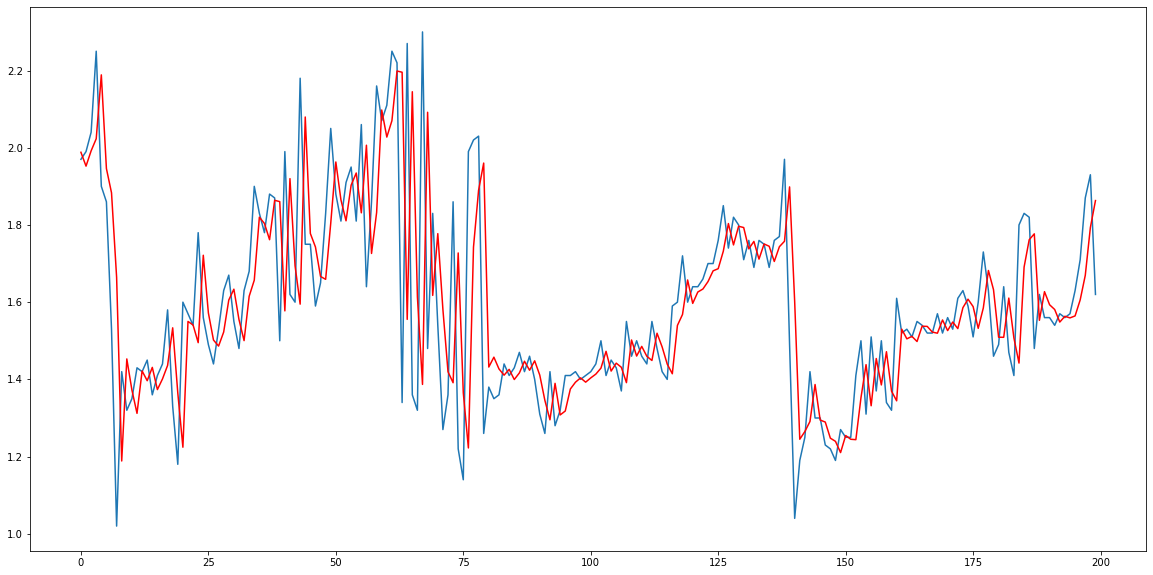

In [51]:

fig = plt.figure(figsize=(20, 10))
pyplot.plot(range(len(predictions)), avoc1[-200:])
pyplot.plot(range(len(predictions)), predictions, color='red')
pyplot.show()

In [35]:
predictions = [item for sublist in predictions for item in sublist]

In [36]:
print(mean_squared_error(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))
print(mean_absolute_error(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))
print(rmse(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))
print(mean_absolute_percentage_error(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))

0.3422211785040398
0.5243638638391102
0.5849967337550184
53.76861748858304


In [50]:
predictions = arch(avoc1, 'garch')



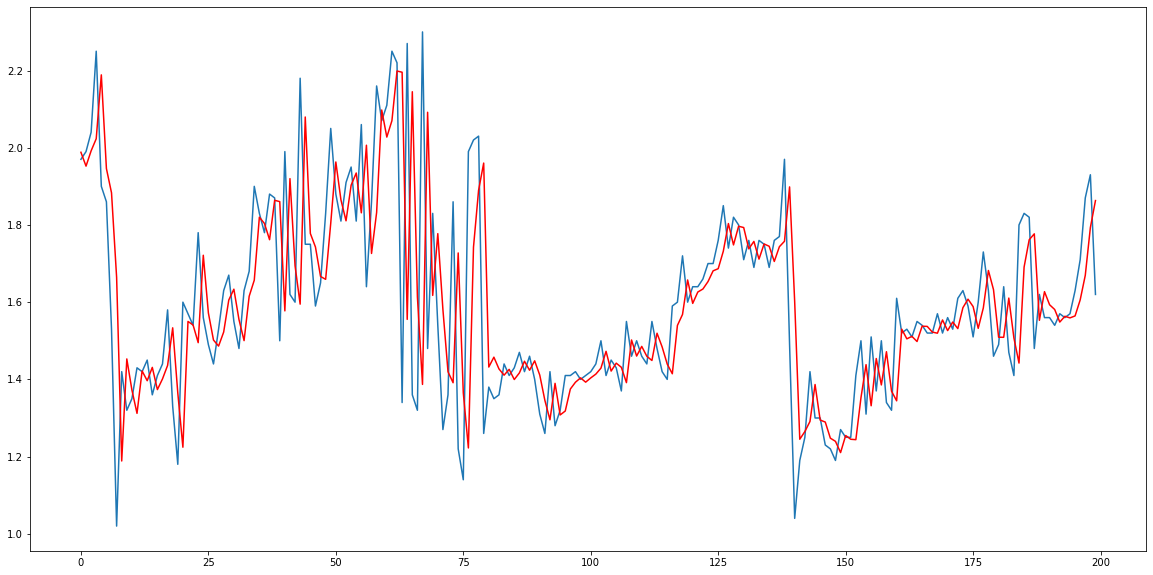

In [47]:
fig = plt.figure(figsize=(20, 10))
pyplot.plot(range(len(predictions)), avoc1[-200:])
pyplot.plot(range(len(predictions)), predictions, color='red')
pyplot.show()

In [49]:
print(mean_squared_error(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))
print(mean_absolute_error(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))
print(rmse(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))
print(mean_absolute_percentage_error(cls[int(len(avoc1) * 0.8):len(avoc1)], predictions))

0.34221680115045644
0.5243438811709374
0.5849929923943161
53.76655922228986
